# Lecture 11 状態空間モデル

岩政追加その２

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import io
#import requests
import statsmodels.api as sm

In [11]:
!ls

DataCard		 fig_PROB_NormalDist_Sim100.png  fig_SVM_HM_MO_02.png
DataCard.tar.gz		 fig_REG_GLM_Poisson1_hist.png	 helpers_05_08.py
Downloads		 fig_SVM_HM_CIR_01.png		 javaproj
__pycache__		 fig_SVM_HM_CIR_02.png		 miniconda3
aaa.png			 fig_SVM_HM_LN_01.png		 mynotebook
decision_tree.svg	 fig_SVM_HM_LN_02.png		 proj
fig_PROB_NormalDist.png  fig_SVM_HM_MO_01.png


In [2]:

# 月ごとの飛行機の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
df = pd.read_csv("./data/AirPassengers.csv",
                   index_col="Month", 
                   parse_dates=True, 
                   dtype="float")
df.head()

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

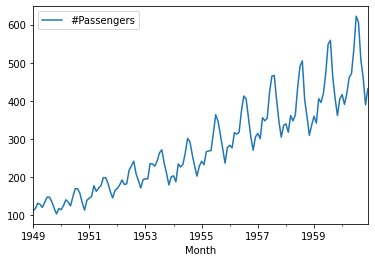

In [3]:
df.plot()

In [4]:
df.columns

Index(['#Passengers'], dtype='object')

In [5]:
# 学習と評価データに分割
df_train = df[df.index < '1957-04-01']
df_test = df[df.index >= '1957-04-01']

c:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 4.537912
         Iterations: 8
         Function evaluations: 21
         Gradient evaluations: 21


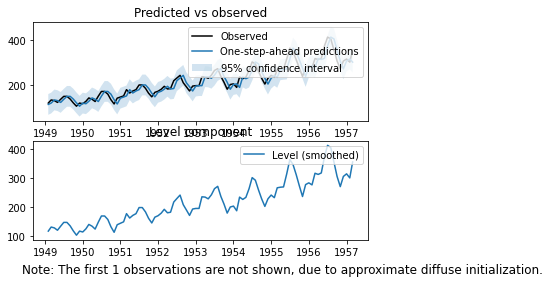

In [6]:


# local level model
local_level_model = sm.tsa.UnobservedComponents(df_train, 'llevel')
# parameter estimation with maximum likelihood estimation
local_level_params = local_level_model.fit(
                        method='bfgs', 
                        maxiter=500)
# plot summary
fig = local_level_params.plot_components()

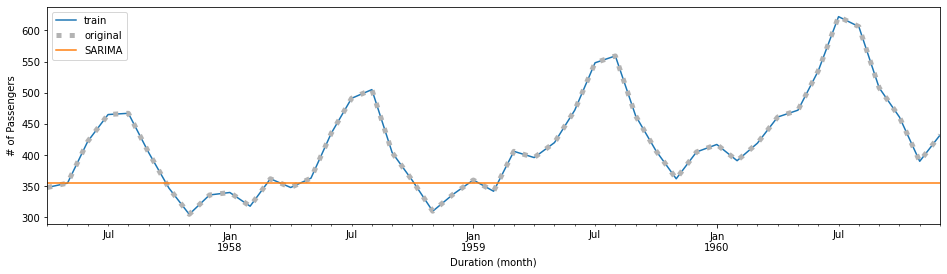

In [9]:
st = pd.to_datetime(df_test.index[0])
ed = pd.to_datetime(df_test.index[-1])
# forecast future values
local_level_pred = local_level_params.predict(st, ed)
# plot results
ax1 = df_test.plot(figsize=(16,4))
df_test.plot(color="0.7",
          linestyle='dotted',
          linewidth="5.0",
          ax=ax1)
#sarima_pred.plot(ax=ax1)
local_level_pred.plot(ax=ax1)
plt.legend(['train', 'original', 'SARIMA', 'State Space'])
plt.xlabel('Duration (month)')
plt.ylabel('# of Passengers')
plt.show()

c:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 3.400938
         Iterations: 64
         Function evaluations: 113
         Gradient evaluations: 113


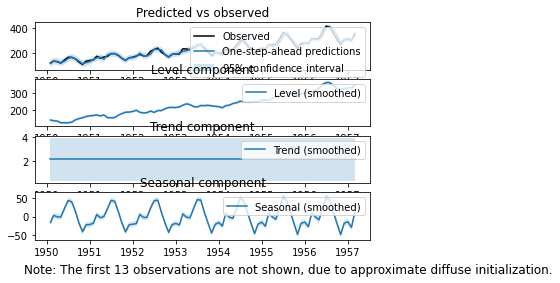

In [7]:
# local level model with seasonality
seasonal_model = sm.tsa.UnobservedComponents(df_train, 'lltrend', seasonal=12)
# parameter estimation with maximum likelihood estimation
seasonal_params = seasonal_model.fit(
                        method='bfgs', 
                        maxiter=500)
# plot summary
fig = seasonal_params.plot_components()

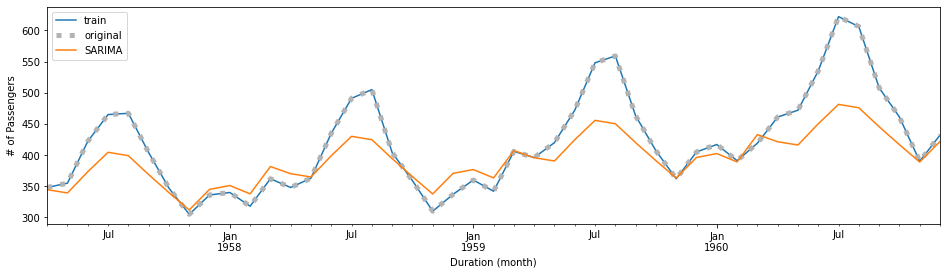

In [8]:
st = pd.to_datetime(df_test.index[0])
ed = pd.to_datetime(df_test.index[-1])
# forecast future values
statespace_pred = seasonal_params.predict(st, ed)
# plot results
ax1 = df_test.plot(figsize=(16,4))
df_test.plot(color="0.7",
          linestyle='dotted',
          linewidth="5.0",
          ax=ax1)
#sarima_pred.plot(ax=ax1)
statespace_pred.plot(ax=ax1)
plt.legend(['train', 'original', 'SARIMA', 'State Space'])
plt.xlabel('Duration (month)')
plt.ylabel('# of Passengers')
plt.show()

## Localmodel

https://logics-of-blue.com/wp-content/uploads/2017/05/python-state-space-models.html

In [10]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats

# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
import statsmodels.api as sm

In [13]:
data  = pd.read_csv("./data/AirPassengers.csv",
                   index_col="Month", 
                   parse_dates=True, 
                   dtype="float")
data .head()

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [14]:
# 日付形式にする
ts = data['#Passengers'] 
ts.head()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: #Passengers, dtype: float64

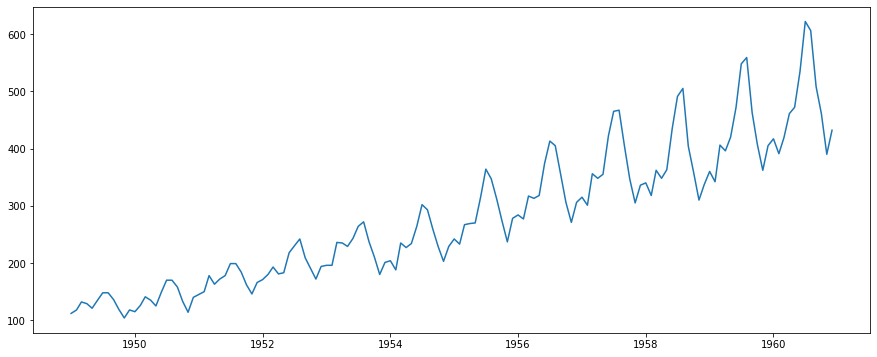

In [15]:
# プロット
plt.plot(ts)

ローカルレベルモデルの推定


c:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                        Unobserved Components Results                         
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                    local level   Log Likelihood                -705.955
Date:                Tue, 10 May 2022   AIC                           1415.909
Time:                        20:11:27   BIC                           1421.835
Sample:                    01-01-1949   HQIC                          1418.317
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.311e-07     85.482   1.53e-09      1.000    -167.542     167.542
sigma2.level      1136.4043    176.695      6.431      0.000     790.088    1482.721
Ljung-Box (L1) (Q):         

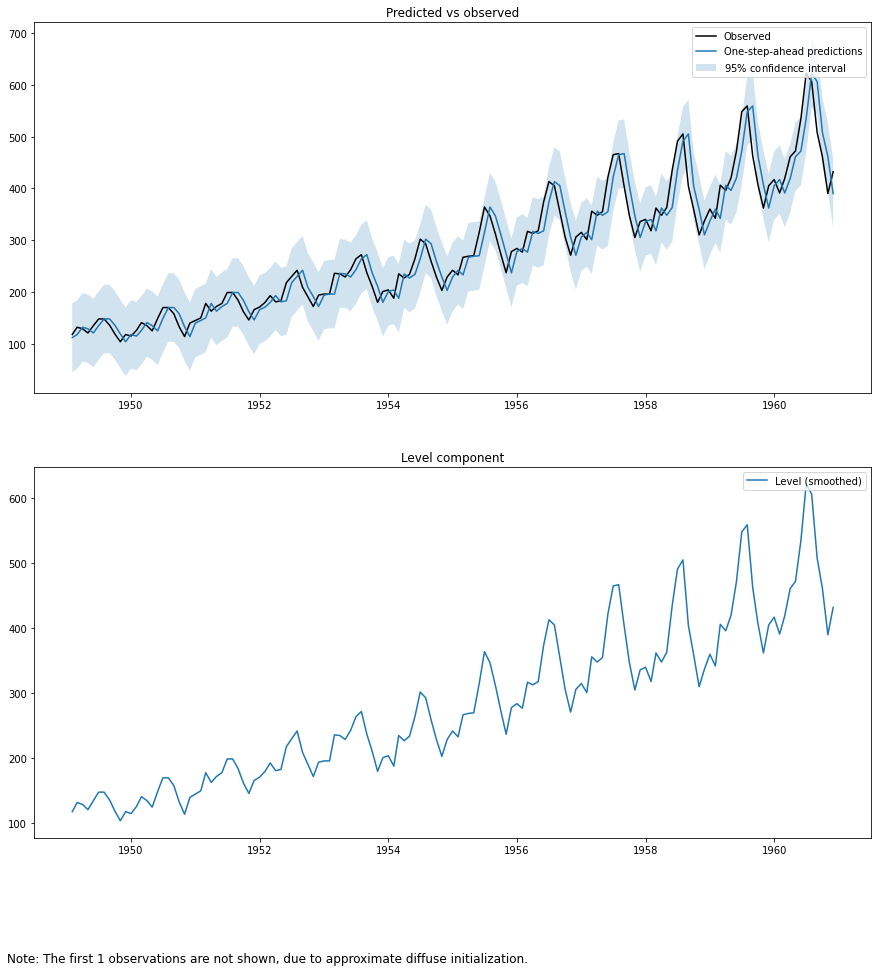

In [16]:
# ローカルレベルモデルの推定
mod_local_level = sm.tsa.UnobservedComponents(ts, 'local level')

# 最尤法によるパラメタの推定
res_local_level = mod_local_level.fit()

# 推定されたパラメタ一覧
print(res_local_level.summary())

# 推定された状態・トレンドの描画
rcParams['figure.figsize'] = 15, 15
fig = res_local_level.plot_components()

ローカル線形トレンドモデルの推定

c:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 5.015259
         Iterations: 19
         Function evaluations: 30
         Gradient evaluations: 30
                        Unobserved Components Results                         
Dep. Variable:            #Passengers   No. Observations:                  144
Model:             local linear trend   Log Likelihood                -722.197
Date:                Tue, 10 May 2022   AIC                           1450.394
Time:                        20:11:52   BIC                           1459.262
Sample:                    01-01-1949   HQIC                          1453.998
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    86.590

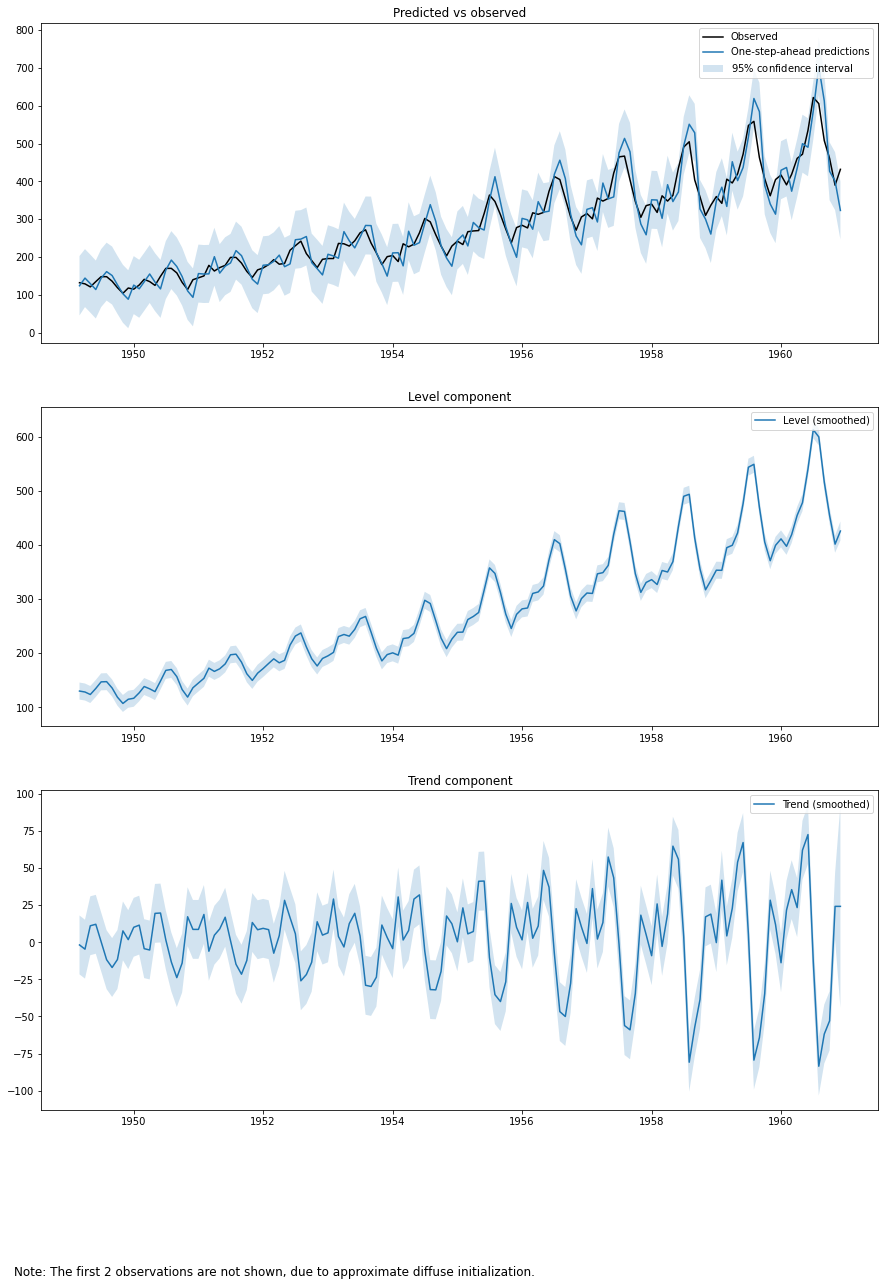

In [17]:
# ローカル線形トレンドモデル

mod_trend = sm.tsa.UnobservedComponents(
    ts,
    'local linear trend'
)

# 最尤法によるパラメタの推定
# ワーニングが出たのでBFGS法で最適化する
res_trend = mod_trend.fit(method='bfgs')

# 推定されたパラメタ一覧
print(res_trend.summary())

# 推定された状態・トレンドの描画
rcParams['figure.figsize'] = 15, 20
fig = res_trend.plot_components()

季節変動の取り込み


c:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 3.969241
         Iterations: 148
         Function evaluations: 266
Optimization terminated successfully.
         Current function value: 3.969241
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                            Unobserved Components Results                            
Dep. Variable:                   #Passengers   No. Observations:                  144
Model:                           local level   Log Likelihood                -571.571
                   + stochastic seasonal(12)   AIC                           1149.142
Date:                       Tue, 10 May 2022   BIC                           1157.790
Time:                               20:12:52   HQIC                          1152.656
Sample:                           01-01-1949                                         
                                - 12-01-1960                                         
Cov

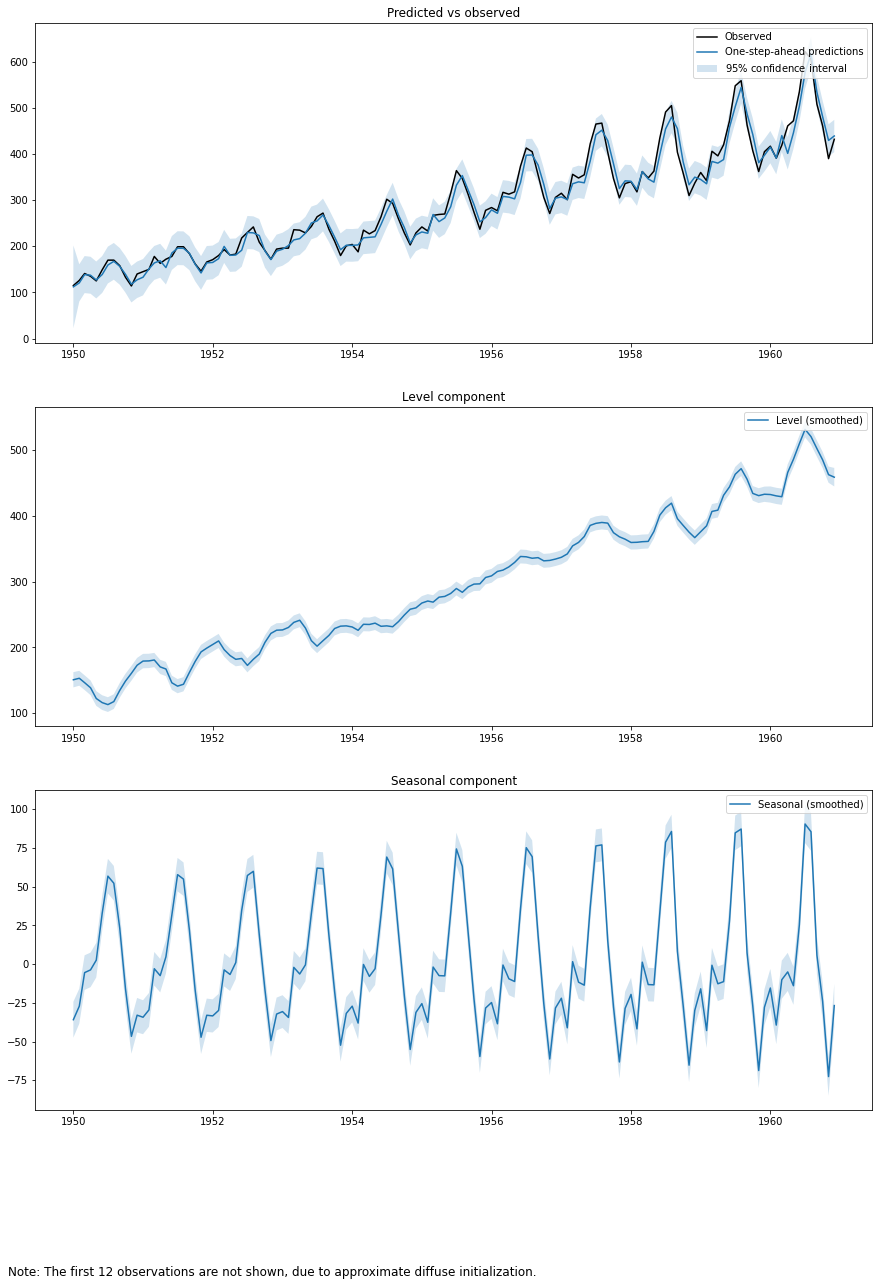

In [18]:
# 季節変動ありのローカルレベルモデル

mod_season_local_level = sm.tsa.UnobservedComponents(
    ts,
    'local level',
    seasonal=12)

# まずはNelder-Meadでパラメタを推定し、その結果を初期値としてまた最適化する。2回目はBFGSを使用。
res_season_local_level = mod_season_local_level.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_local_level.fit(method='nm', maxiter=500).params,
)

# 推定されたパラメタ一覧
print(res_season_local_level.summary())

# 推定された状態・トレンド・季節の影響の描画
rcParams['figure.figsize'] = 15, 20
fig = res_season_local_level.plot_components()

c:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 3.930912
         Iterations: 495
         Function evaluations: 827
Optimization terminated successfully.
         Current function value: 3.930912
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                            Unobserved Components Results                            
Dep. Variable:                   #Passengers   No. Observations:                  144
Model:                    local linear trend   Log Likelihood                -566.051
                   + stochastic seasonal(12)   AIC                           1140.103
Date:                       Tue, 10 May 2022   BIC                           1151.603
Time:                               20:13:12   HQIC                          1144.776
Sample:                           01-01-1949                                         
                                - 12-01-1960                                         
Cov

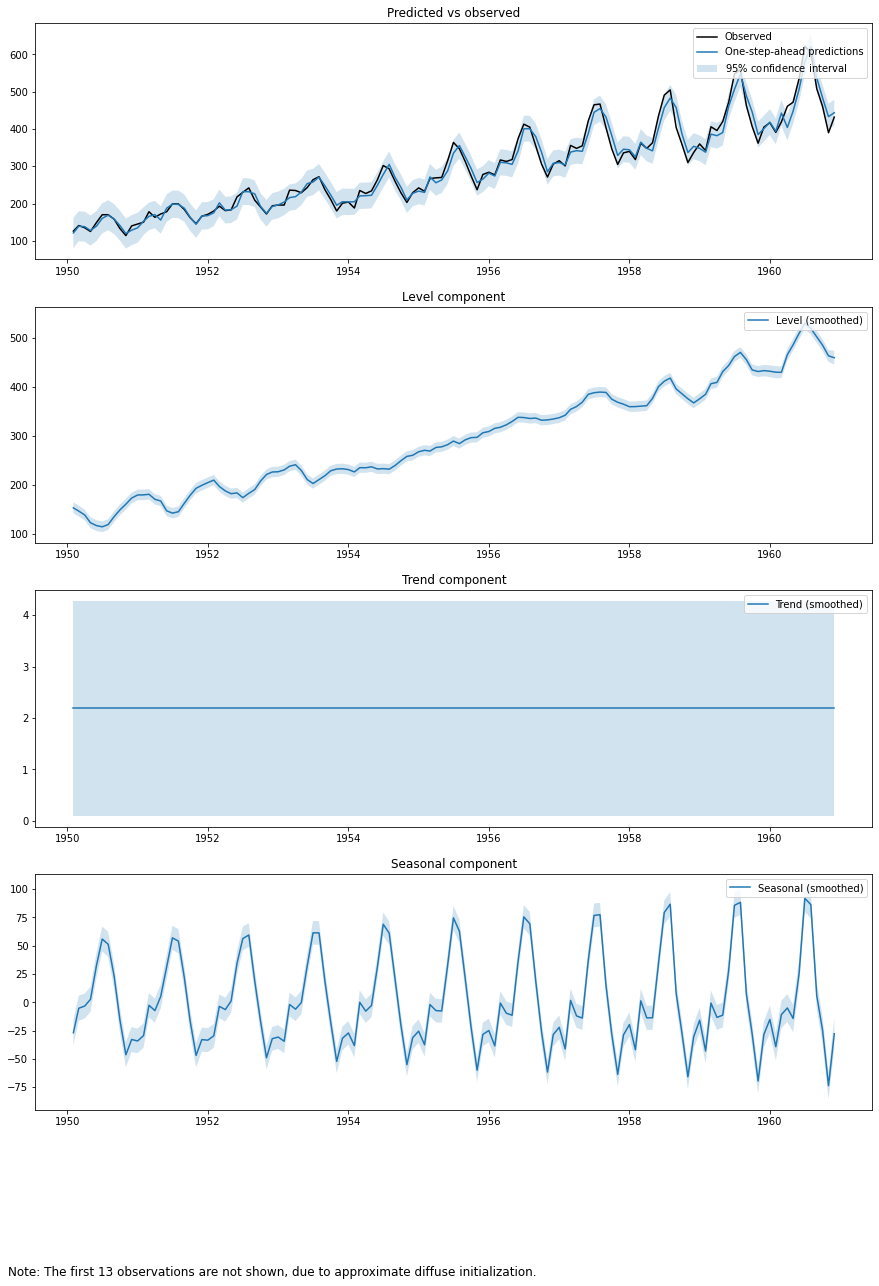

In [19]:
# 季節変動ありのローカル線形トレンドモデル

mod_season_trend = sm.tsa.UnobservedComponents(
    ts,
    'local linear trend',
    seasonal=12)

# まずはNelder-Meadでパラメタを推定し、その結果を初期値としてまた最適化する。2回目はBFGSを使用。
res_season_trend = mod_season_trend.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_trend.fit(method='nm', maxiter=500).params,
)

# 推定されたパラメタ一覧
print(res_season_trend.summary())

# 推定された状態・トレンド・季節の影響の描画
rcParams['figure.figsize'] = 15, 20
fig = res_season_trend.plot_components()

推定するパラメタの数を減らす

c:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 3.930912
         Iterations: 115
         Function evaluations: 209
Optimization terminated successfully.
         Current function value: 3.930912
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                               Unobserved Components Results                                
Dep. Variable:                          #Passengers   No. Observations:                  144
Model:             local linear deterministic trend   Log Likelihood                -566.051
                          + stochastic seasonal(12)   AIC                           1138.103
Date:                              Tue, 10 May 2022   BIC                           1146.728
Time:                                      20:13:38   HQIC                          1141.608
Sample:                                  01-01-1949                                         
                                       -

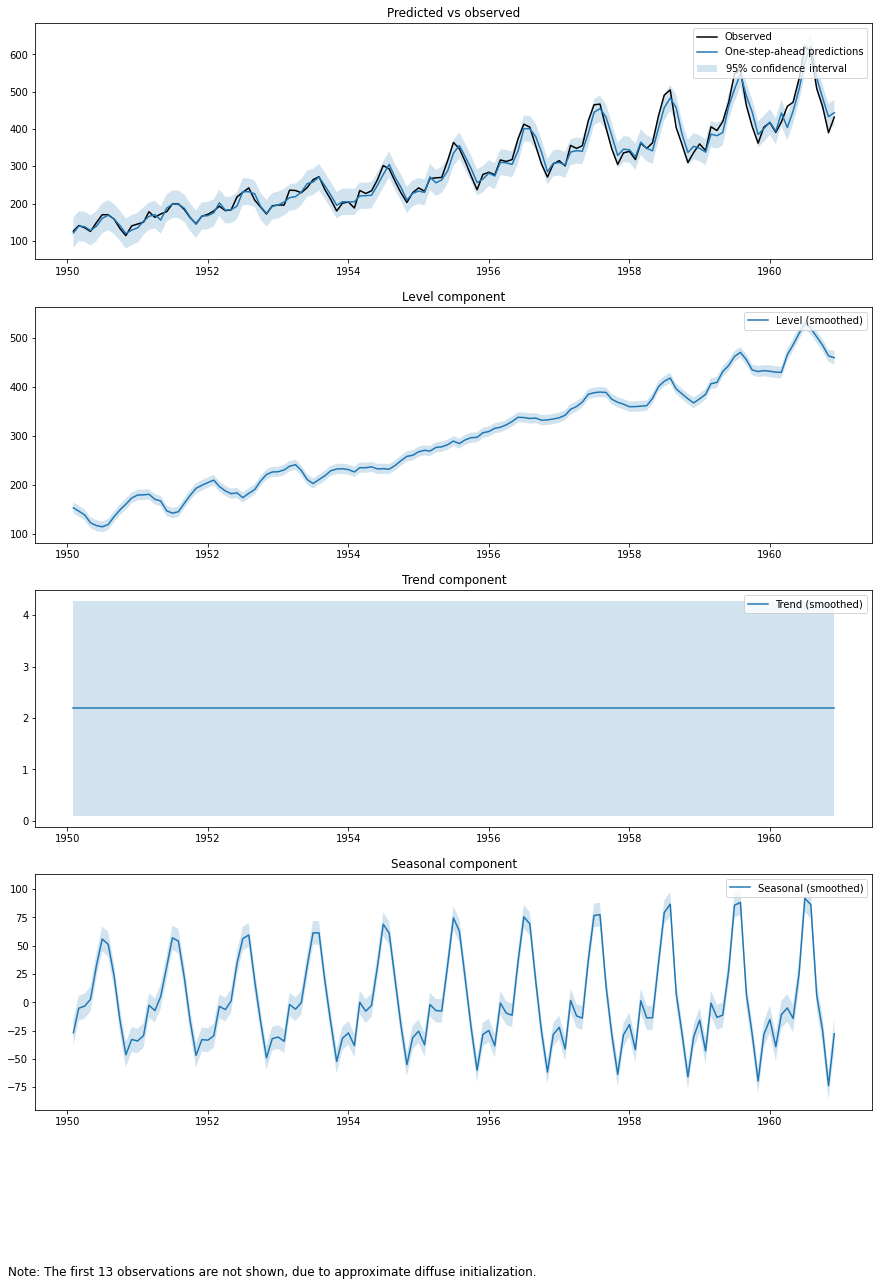

In [20]:
# 詳細は以下の資料を参照してください
# http://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html#statsmodels.tsa.statespace.structural.UnobservedComponents

# 季節変動ありのローカル線形トレンドモデル
# ただし、トレンドの分散は無し

mod_season_trend_d = sm.tsa.UnobservedComponents(
    ts,
    'local linear deterministic trend',
    seasonal=12)

# まずはNelder-Meadでパラメタを推定し、その結果を初期値としてまた最適化する。2回目はBFGSを使用。
res_season_trend_d = mod_season_trend_d.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_trend_d.fit(method='nm', maxiter=500).params,
)

# 推定されたパラメタ一覧
print(res_season_trend_d.summary())

# 推定された状態・トレンド・季節の影響の描画
rcParams['figure.figsize'] = 15, 20
fig = res_season_trend_d.plot_components()

c:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 3.930912
         Iterations: 66
         Function evaluations: 130
Optimization terminated successfully.
         Current function value: 3.930912
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                            Unobserved Components Results                            
Dep. Variable:                   #Passengers   No. Observations:                  144
Model:                random walk with drift   Log Likelihood                -566.051
                   + stochastic seasonal(12)   AIC                           1136.103
Date:                       Tue, 10 May 2022   BIC                           1141.853
Time:                               20:13:57   HQIC                          1138.439
Sample:                           01-01-1949                                         
                                - 12-01-1960                                         
Cova

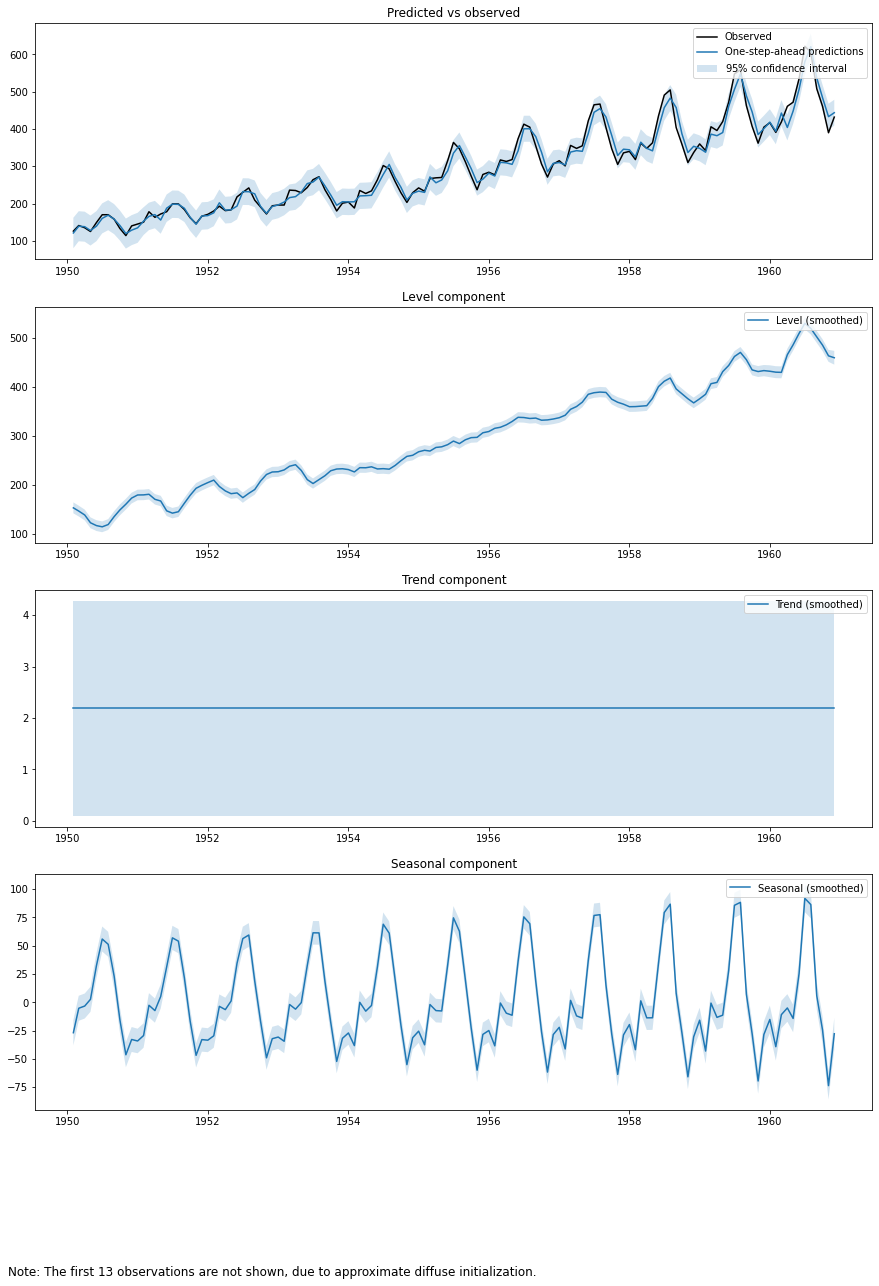

In [21]:
# 詳細は以下の資料を参照してください
# http://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html#statsmodels.tsa.statespace.structural.UnobservedComponents

# 季節変動ありのローカル線形トレンドモデル
# ただし、トレンドの分散は無し

mod_season_rw = sm.tsa.UnobservedComponents(
    ts,
    'random walk with drift',
    seasonal=12)

# まずはNelder-Meadでパラメタを推定し、その結果を初期値としてまた最適化する。2回目はBFGSを使用。
res_season_rw = mod_season_rw.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_rw.fit(method='nm', maxiter=500).params,
)

# 推定されたパラメタ一覧
print(res_season_rw.summary())

# 推定された状態・トレンド・季節の影響の描画
rcParams['figure.figsize'] = 15, 20
fig = res_season_rw.plot_components()

In [25]:
# 今まで計算してきたモデルのAICを格納する
aic_list = pd.DataFrame(index=range(6), columns=["model", "aic"])

aic_list.iloc[0]["model"] = "res_local_level"
aic_list.iloc[0]["aic"] = res_local_level.aic

aic_list.iloc[1]["model"] = "res_trend"
aic_list.iloc[1]["aic"] = res_trend.aic

aic_list.iloc[2]["model"] = "res_season_local_level"
aic_list.iloc[2]["aic"] = res_season_local_level.aic

aic_list.iloc[3]["model"] = "res_season_trend"
aic_list.iloc[3]["aic"] = res_season_trend.aic

aic_list.iloc[4]["model"] = "res_season_trend_d"
aic_list.iloc[4]["aic"] = res_season_trend_d.aic

aic_list.iloc[5]["model"] = "res_season_rw"
aic_list.iloc[5]["aic"] = res_season_rw.aic


# 結果の表示
aic_list

,model,aic
0,res_local_level,1415.909117
1,res_trend,1450.394469
2,res_season_local_level,1149.141543
3,res_season_trend,1140.102616
4,res_season_trend_d,1138.102616
5,res_season_rw,1136.102616


Text(0.5, 1.0, 'res_season_rw')

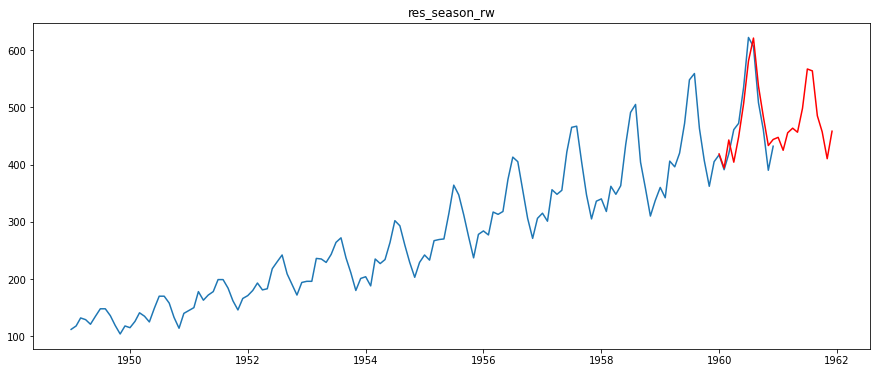

In [27]:
# 予測
pred = res_season_rw.predict('1960-01-01', '1961-12-01')

# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(ts)
plt.plot(pred, "r")
plt.title('res_season_rw')

Text(0.5, 1.0, 'res_local_level')

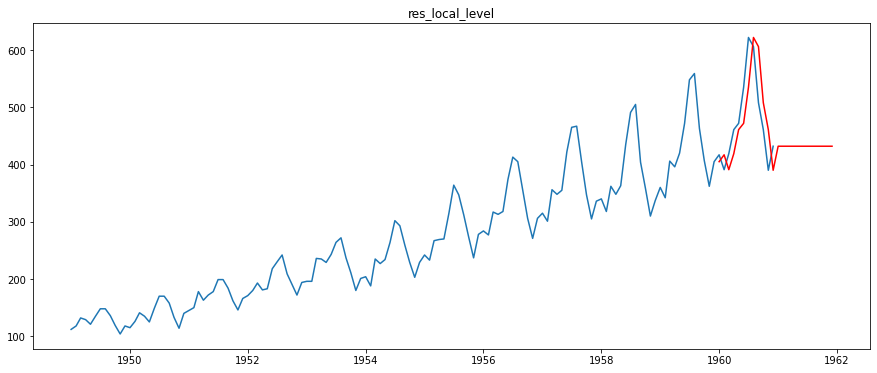

In [28]:
# 予測
pred = res_local_level.predict('1960-01-01', '1961-12-01')

# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(ts)
plt.plot(pred, "r")
plt.title('res_local_level')

Text(0.5, 1.0, 'res_trend')

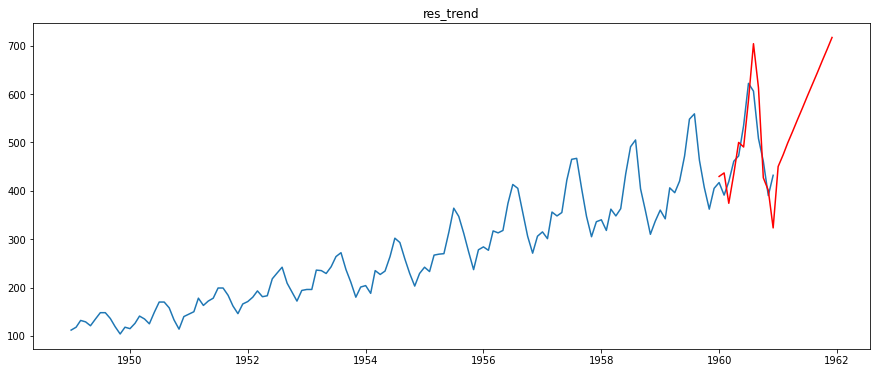

In [29]:
# 予測
pred = res_trend.predict('1960-01-01', '1961-12-01')

# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(ts)
plt.plot(pred, "r")
plt.title('res_trend')

Text(0.5, 1.0, 'res_season_local_level')

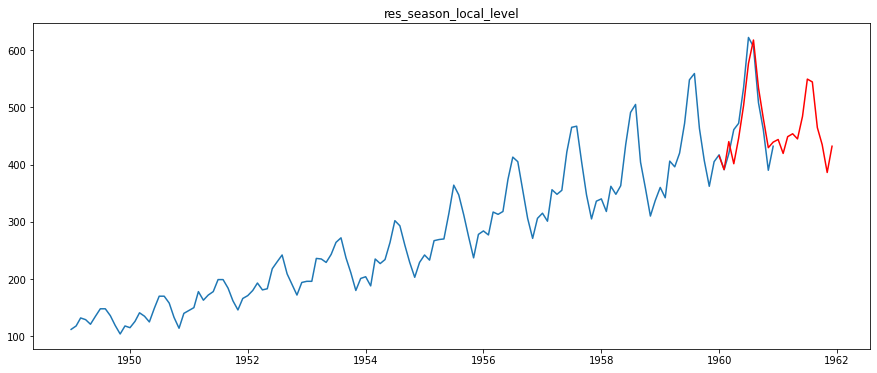

In [30]:
# 予測
pred = res_season_local_level.predict('1960-01-01', '1961-12-01')

# 実データと予測結果の図示
rcParams['figure.figsize'] = 15, 6
plt.plot(ts)
plt.plot(pred, "r")
plt.title('res_season_local_level')